In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset file
telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_base_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#description of statistics of numeric variables
telco_base_data.describe()  #describe only works on numeric variables

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

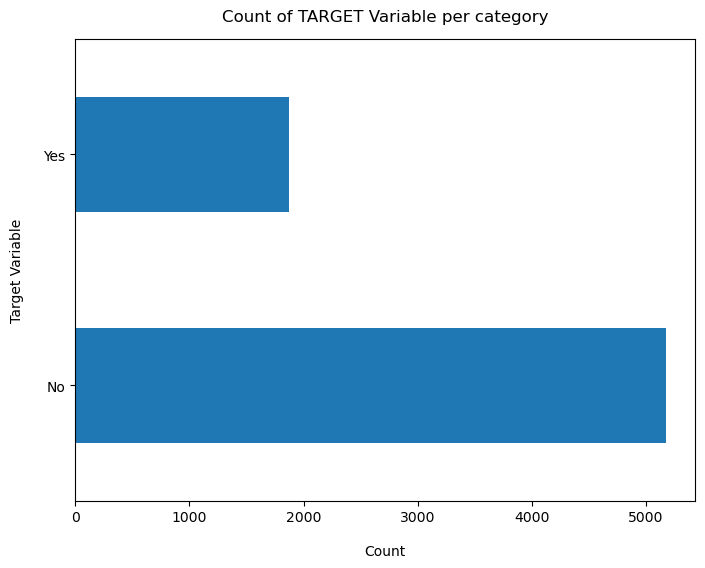

In [8]:
telco_base_data['Churn'].value_counts().plot(kind = 'barh' , figsize = (8,6))
plt.xlabel("Count", labelpad = 14)
plt.ylabel("Target Variable", labelpad = 14)
plt.title("Count of TARGET Variable per category" ,y =1.02);

In [9]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])           #simple percentage calculation

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Upsampling
Increasing the rate of already sampled signals, or increasing the frequency of samples. For example, upsampling can increase the frequency of samples from minutes to seconds. Upsampling can also be used to manipulate a signal to artificially increase the sampling rate.
Downsampling
Decreasing the rate of already sampled signals, or decreasing the frequency of samples. Downsampling can reduce the spatial resolution while keeping the same 2D representation. Downsampling can also reduce the dimensionality of features while losing some information. Downsampling is often used to reduce the storage and/or transmission requirements of images

In [11]:
#Above is done to balance the dataset in all size and data aspect


In [12]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


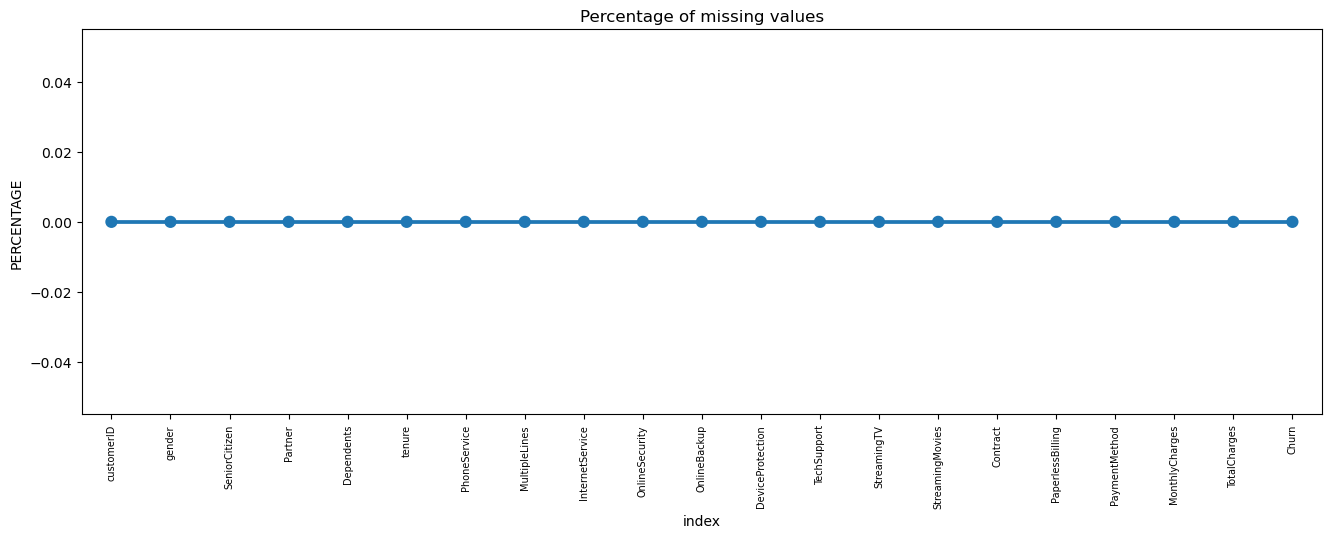

In [13]:
# percentage missing values calculator
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot( x = "index" ,y = 0 ,data = missing)
plt.xticks(rotation = 90 , fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [137]:
telco_data = telco_base_data.copy()

In [15]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges , errors ='coerce')  #coerce meaning to convert from one datatype to one another

In [16]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [18]:
#nan not a number

In [19]:
#Removing missing values
telco_data.dropna(how = 'any' , inplace = True)

In [20]:
#dropna removes the row having null data .. enjoy than

#telco_data.fillna() opposite of dropna


5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...



In [21]:
telco_data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

In [22]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [23]:
#Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure , range (1,80,12) , right=False , labels = labels)

In [24]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [25]:
telco_data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7038         Yes         Yes             Yes        One year              Yes   
7039          No         Yes             Yes        One year              Yes   
7040          No          No              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   
7042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7038               Mailed check          84.80      1990.50     No   
7039    Credit card (automatic)         103.20      7362.90     No   
7040           Electronic check          29.60       346.45     No   
7041               Mailed check          74.40       306.60    Yes   
7042  Bank transfer (automatic)         105.65      6844.50     No   

      tenure_group  
0           1 - 12  
1          25 - 36  
2           1 - 12  
3          37 - 48  
4           1 - 12  
...            ...  
7038       13 - 24  
7039       61 - 72  
7040        1 - 12  
7041        1 - 12  
7042       61 - 72  

[7032 rows x 22 columns]

In [26]:
#customer id is a irrelevant column , so ignoring id and tenure because we have tenure_group

In [138]:
telco_data.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)

In [139]:
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

Univariate Data Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


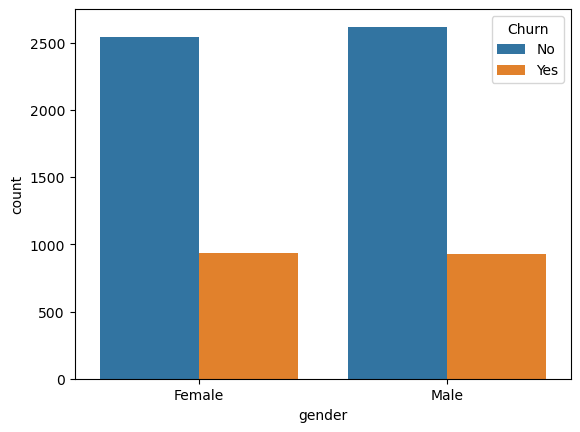

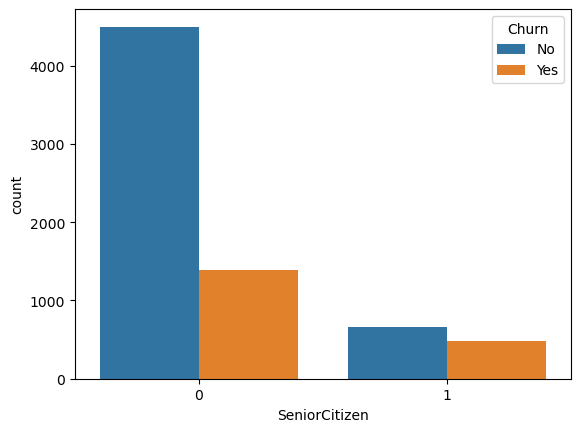

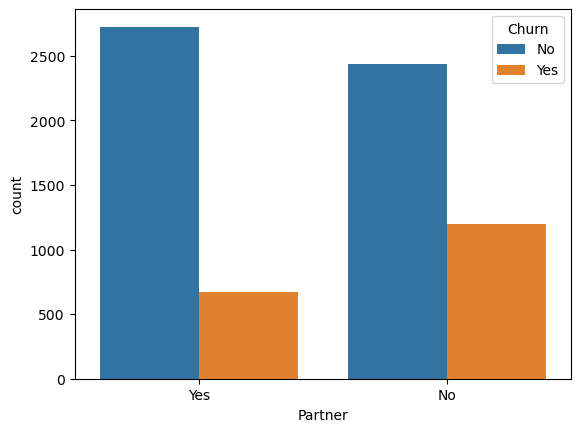

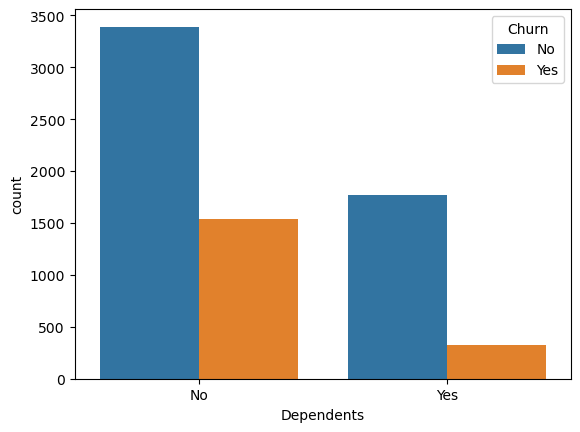

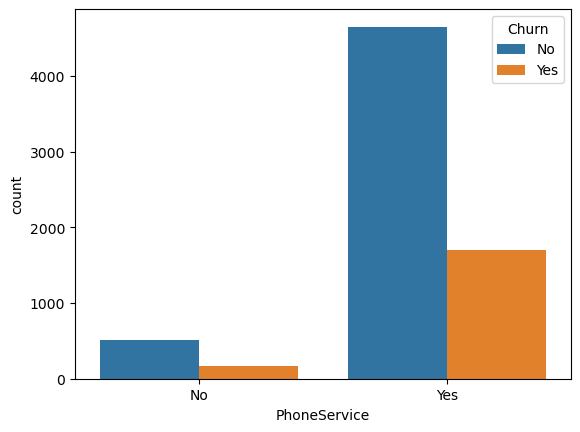

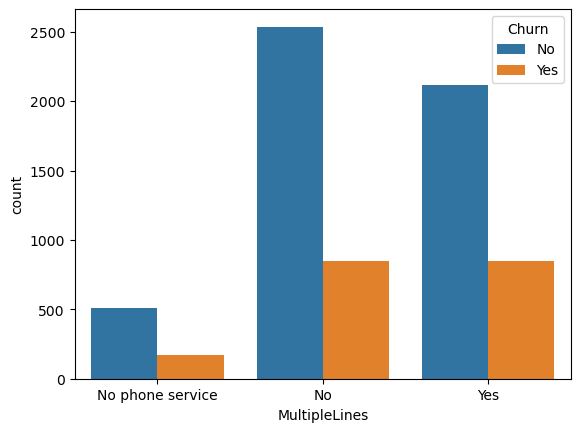

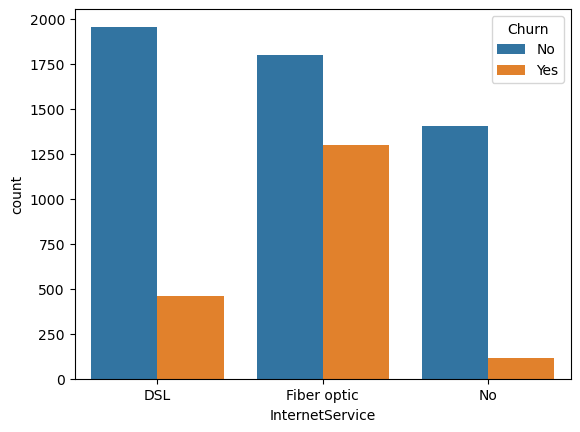

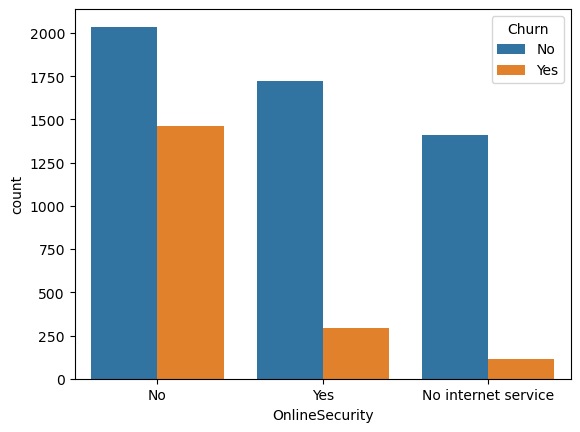

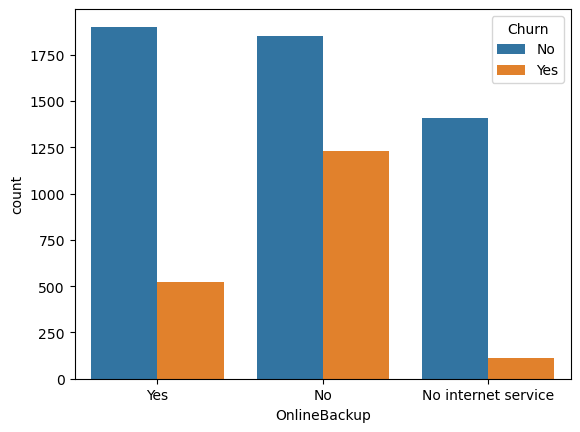

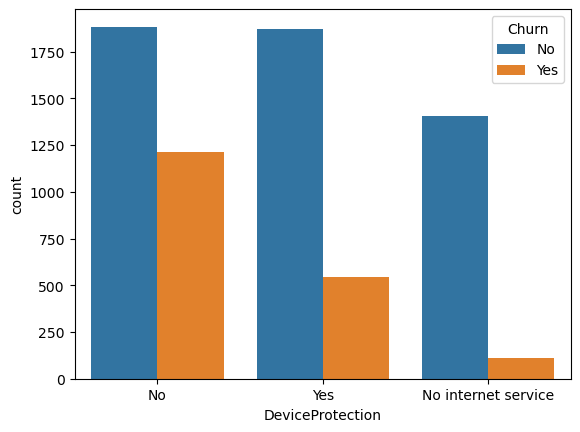

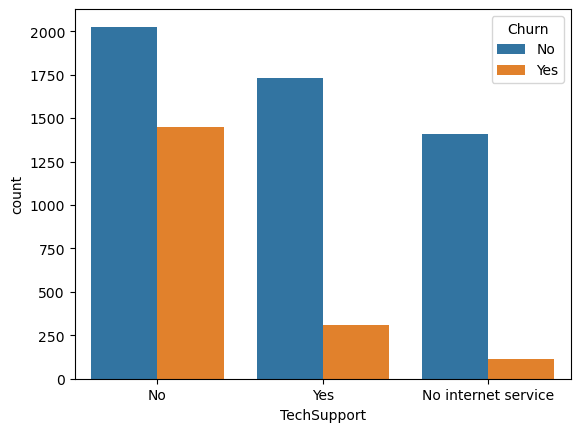

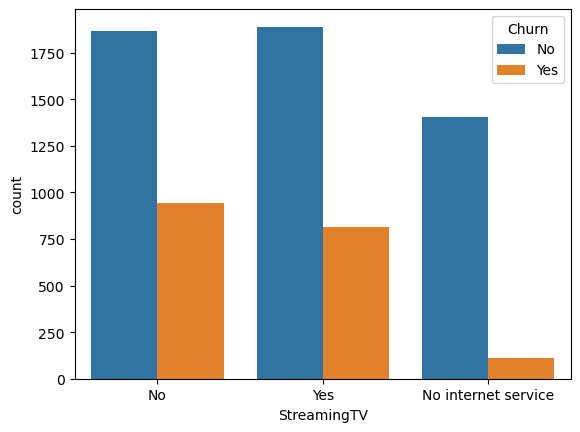

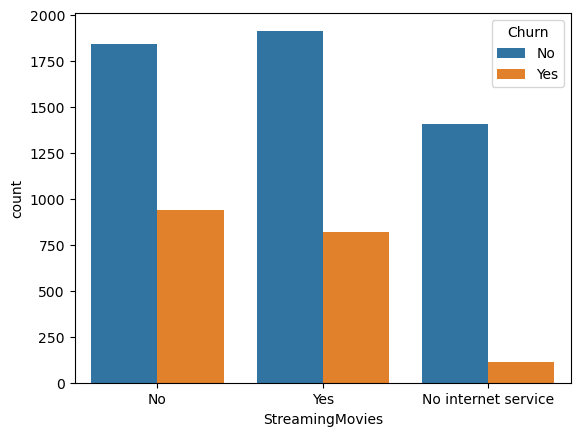

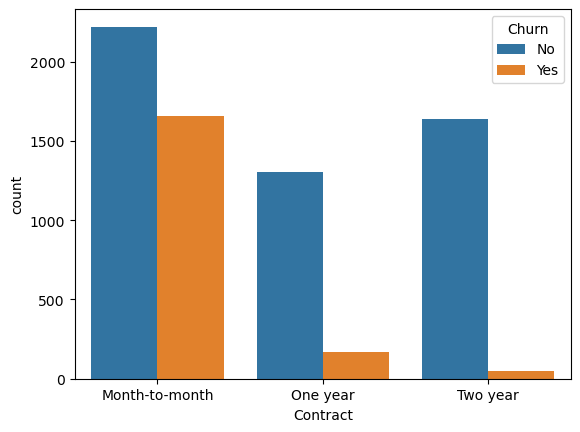

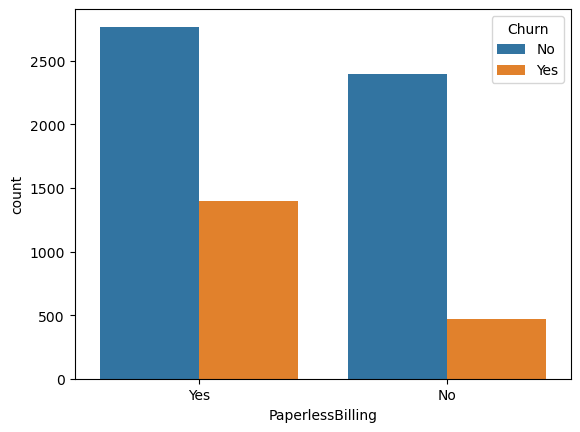

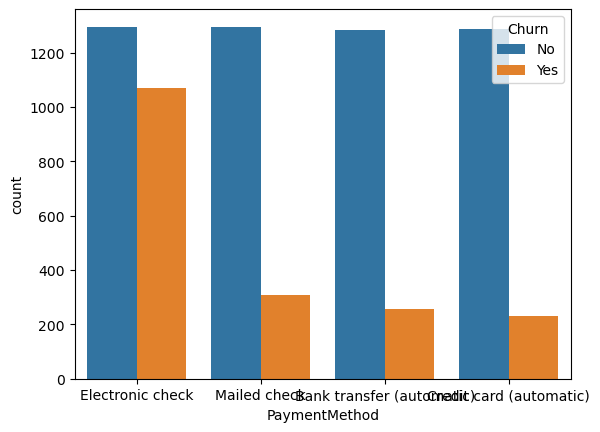

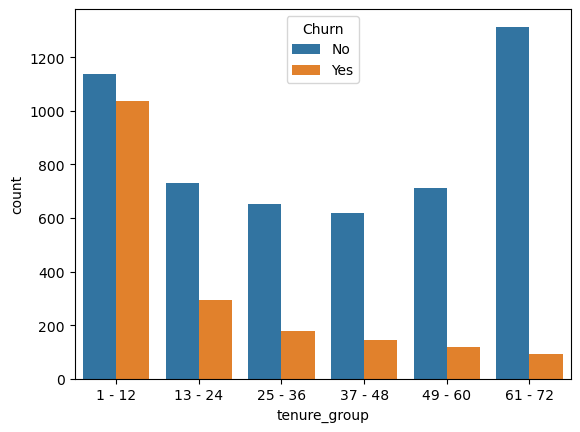

In [29]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [129]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes' ,0,1)

In [153]:
mapping = {'yes': 1, 'no': 0}
Churn = np.vectorize(lambda x: mapping[x])(telco_data)


KeyError: 'Female'

In [149]:
telco_data.head()


gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

3. Convert all the categorical variables into dummy variables

In [32]:
    # use ONE HOT ENCODING also panda provides features for it  get_dummies

In [33]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0           True   
1              0           56.95       1889.50      0          False   
2              0           53.85        108.15      0          False   
3              0           42.30       1840.75      0          False   
4              0           70.70        151.65      0           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0        False       False         True           True           False  ...   
1         True        True        False           True           False  ...   
2         True        True        False           True           False  ...   
3         True        True        False           True           False  ...   
4        False        True        False           True           False  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                       False                 True                 False   
1                        True                False                 False   
2                        True                 True                 False   
3                       False                False                 False   
4                       False                 True                 False   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60  \
0                 False                 False                 False   
1                  True                 False                 False   
2                 False                 False                 False   
3                 False                  True                 False   
4                 False                 False                 False   

   tenure_group_61 - 72  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 51 columns]

**9. ** Relationship between Monthly Charges and Total Charges

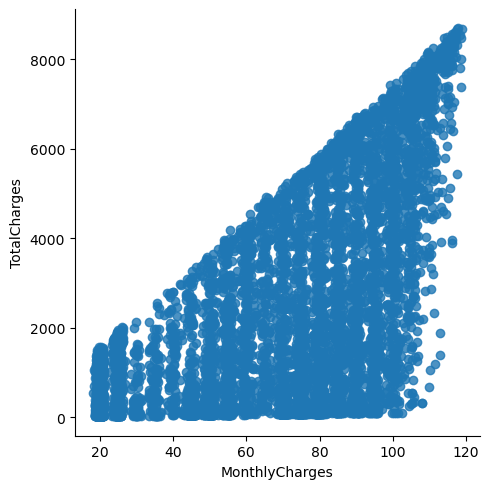

In [34]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges' , y ='TotalCharges' , fit_reg = False)

Total Charges increase as Monthly Charges increase - as expected.

In [35]:
telco_data_dummies

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0                 0           29.85         29.85      0           True   
1                 0           56.95       1889.50      0          False   
2                 0           53.85        108.15      0          False   
3                 0           42.30       1840.75      0          False   
4                 0           70.70        151.65      0           True   
...             ...             ...           ...    ...            ...   
7038              0           84.80       1990.50      0          False   
7039              0          103.20       7362.90      0           True   
7040              0           29.60        346.45      0           True   
7041              1           74.40        306.60      0          False   
7042              0          105.65       6844.50      0          False   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0           False       False         True           True           False   
1            True        True        False           True           False   
2            True        True        False           True           False   
3            True        True        False           True           False   
4           False        True        False           True           False   
...           ...         ...          ...            ...             ...   
7038         True       False         True          False            True   
7039        False       False         True          False            True   
7040        False       False         True          False            True   
7041         True       False         True           True           False   
7042         True        True        False           True           False   

      ...  PaymentMethod_Bank transfer (automatic)  \
0     ...                                    False   
1     ...                                    False   
2     ...                                    False   
3     ...                                     True   
4     ...                                    False   
...   ...                                      ...   
7038  ...                                    False   
7039  ...                                    False   
7040  ...                                    False   
7041  ...                                    False   
7042  ...                                     True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False                            True   
1                                     False                           False   
2                                     False                           False   
3                                     False                           False   
4                                     False                            True   
...                                     ...                             ...   
7038                                  False                           False   
7039                                   True                           False   
7040                                  False                            True   
7041                                  False                           False   
7042                                  False                           False   

      PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                          False                 True                 False   
1                           True                False                 False   
2                           True                 True                 False   
3                          False                False                 False   
4                          False                 True                 False   
...                          ...                  ...                   ...   
7038                        T

In [36]:
telco_data

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0              Electronic check           29.85         29.85      0   
1                  Mailed check           56.95       1889.50      0   
2                  Mailed check           53.85        108.15      0   
3     Bank transfer (automatic)           42.30       1840.75      0   
4              Electronic check           70.70        151.65      0   
...                         ...             ...           ...    ...   
7038               Mailed check           84.80       1990.50      0   
7039    Credit card (automatic)          103.20       7362.90      0   
7040           Electronic check           29.60        346.45      0   
7041               Mailed check           74.40        306.60      0   
7042  Bank transfer (automatic)          105.65       6844.50      0   

     tenure_group  
0          1 - 12  
1         25 - 36  
2          1 - 12  
3         37 - 48  
4          1 - 12  
...           ...  
7038      13 - 24  
7039      61 - 72  
7040       1 - 12  
7041       1 - 12  
7042      61 - 72  

[7032 rows x 20 columns]

**10. ** Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

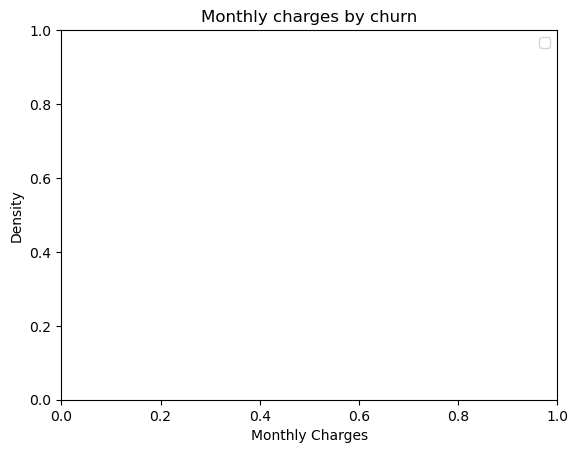

In [82]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges,
                 color ="Red" , fill =True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==1)],
                  color = "Blue" , fill = True)
Mth.legend(["No Churn","Churn"],loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

In [70]:

Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0)],
                ax = Mth , color="Red", fill = False)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1)],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly charges by churn')